<a href="https://colab.research.google.com/github/MohamedS-Siena/computational_physics/blob/main/Mohamed_Shahabuddeen_Lab06_Planetary_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Planetary Motion

*written by Rose Finn*

*adapted from Giordano and Nakanishi, Chapter 4*


The goal of this lab is to model the motion of a planet orbiting a star.  We will start by modeling the Earth's motion around the Sun, but we write the code in such a way that it can be easily adapted to model other 2-body systems.

* In class, we reviewed the units that we will use in the lab, namely our distances will be in Astronomical Units (AU, where 1 AU is the mean distance between the Earth and Sun), and our time will be measured in years.

* We will assume that the Sun is fixed at a central position, and the Earth revolves around it.

In [ ]:
# import numpy and pyplot
import numpy as np
import matplotlib.pyplot as plt

# Write the initialize function

Write a function called **initialize** that does the following.
* Input
  * initial x position, $x_0$
  * initial y position, $y_0$
  * initial x velocity, $v_{0x}$
  * initial y velocity, $v_{0y}$
  * total time, $tmax$
  * time step, $dt$

* The function should:
  *  calculate the number of time steps
  ```
  nsteps = int(tmax/dt)
  ```
  * create the tarr, xarr, yarr, vxarr, vyarr arrays using `np.zeros`
  * set the first value of the xarr array to $x_0$
  * set the first value of the yarr array to $y_0$
  * set the first value of the vxarr array to $v_{0x}$
  * set the first value of the vyarr array to $v_{0y}$

* The function should return the following arrays *in this order*:
  * time array, `tarr`
  * x position array, `xarr`
  * y position array, `yarr`
  * x velocity array, `vxarr`
  * y velocity array, `vyarr`

In [ ]:
# write your initialize function here
def initialize(x0,y0,v0x,v0y,tmax,dt):
  '''
  takes initial position (x,y) and velocity (vx,vy) values, max time, time steps
  sets up empty arrays for position and velocity with initial values
  returns empty arrays
  '''
  nsteps = int(tmax/dt)
  tarr=np.zeros(nsteps)
  xarr=np.zeros(nsteps)
  yarr=np.zeros(nsteps)
  vxarr=np.zeros(nsteps)
  vyarr=np.zeros(nsteps)
  xarr[0] = x0
  yarr[0] = y0
  vxarr[0] = v0x
  vyarr[0] = v0y
  return tarr,xarr,yarr,vxarr,vyarr

# Distance Function

Write a function called **distance** to calculate the distance between the Earth and Sun given the Earth's x and y positions.  We assume throughout that the Sun is located at $x=0, y=0$, and that the Sun does not move.

Write a function called **distance** that does the following.
* Input
  * x position, $x$
  * y position, $y$

* The function should:
  *  calculate the distance between the Earth and Sun
  ```
  r = np.sqrt(x**2 + y**2)
  ```


* The function should return :
  * the distance $r$

In [ ]:
# write your distance function here
def distance(x,y):
  '''
  takes postion values (x,y)
  calculates radius
  returns radius
  '''
  r = np.sqrt(x**2+y**2)
  return r

# Calculate function

Write a function called **calculate** that does the following.
* Input
  * time array, `tarr`
  * x position, `xarr`
  * y position, `yarr`
  * x velocity, `vxarr`
  * y velocity, `vyarr`
  * time step, `dt`
  * optional argument **cromer** that has a default value of ```True```

* The function should:
  * calculate vx, vy, and time
  * if ```cromer=True```, use the Euler-Cromer method to calculate x and y
  * if ```cromer=False```, use the Euler method to calculate x and y

* The function should return the following arrays *in this order*:
  * time array, `tarr`
  * $x$ position array, `xarr`
  * $y$ position array, `yarr`
  * $v_{x}$ velocity array, `vxarr`
  * $v_{y}$ velocity array, `vyarr`

In [ ]:
# write your calculate function
def calculate(tarr,xarr,yarr,vxarr,vyarr,dt,cromer=True):
  '''
  takes in empty arrays from initialize function, dt, and optional cromer conditional
  fill arrays with values using euler cromer or euler method
  returns filled arrays (t,x,y,vx,vy)
  '''
  for i in range(1,len(tarr)):
    r=distance(xarr[i-1],yarr[i-1])
    tarr[i] = tarr[i-1]+dt
    vxarr[i] = vxarr[i-1]-4*np.pi**2*xarr[i-1]/r**3*dt
    vyarr[i] = vyarr[i-1]-4*np.pi**2*yarr[i-1]/r**3*dt
    if cromer==True:
      xarr[i] = xarr[i-1]+vxarr[i]*dt
      yarr[i] = yarr[i-1]+vyarr[i]*dt
    else:
      xarr[i] = xarr[i-1]+vxarr[i-1]*dt
      yarr[i] = yarr[i-1]+vyarr[i-1]*dt
  return tarr,xarr,yarr,vxarr,vyarr

# Function to make plots

Write a function called **make_plots** that does the following.
* Input
  * time array, `tarr`
  * x position, `xarr`
  * y position, `yarr`
  * x velocity, `vxarr`
  * y velocity, `vyarr`


* The function should:
  * set the figure size to (15,4)
  ```python
  plt.figure(figsize=(15,4))
  plt.subplots_adjust(wspace=.35)
  ```
  * use the ```plt.subplot``` command to make a plot with one row and three columns.
  * plot y vs. x in the first panel using scatter, and color the points using the time array.  The following code snippet should help.  Note: we are using ```plt.axis('equal')``` so that the x and y axes are on the same scale.  This will make a circle look like a circle.  Also, plot the position of the Sun using a circle.
  ```
  plt.scatter(xarr,yarr,c=tarr,s=10)
  plt.colorbar(label="Time (yr)")
  plt.axis('equal')
  ```
  * plot xarr, yarr, and the radius (`r = np.sqrt(x**2+y**2) `) vs time in the second plot.
  * plot vxarr, vyarr, and the magnitude of the total velocity  (`v = np.sqrt(vx**2+vy**2) `) vs time in the third plot.
  * be sure to label the axes in each plot, and use the correct units.
  * add a legend to the second and third panels.

* The function does not return anything.

In [ ]:
# write your make_plots function here
def make_plots(tarr,xarr,yarr,vxarr,vyarr):
  '''
  makes the plots:
    y vs x
    x vs t, y vs t, r vs t
    vx vs t, vy vs t, v vs t
  '''
  plt.figure(figsize=(15,4))
  plt.subplots_adjust(wspace=.35)

  plt.subplot(1,3,1)
  plt.scatter(xarr,yarr,c=tarr,s=10)
  plt.plot(0,0,"ro")
  plt.colorbar(label="Time (yr)")
  plt.axis('equal')
  plt.xlabel("x (AU)")
  plt.ylabel("y (AU)")

  plt.subplot(1,3,2)
  plt.scatter(tarr,xarr,label="x")
  plt.scatter(tarr,yarr,label="y")
  plt.scatter(tarr,distance(xarr,yarr),label="r")
  plt.xlabel("t (yr)")
  plt.ylabel("position (AU)")
  plt.legend()

  plt.subplot(1,3,3)
  plt.scatter(tarr,vxarr,label="vx")
  plt.scatter(tarr,vyarr,label="vy")
  plt.scatter(tarr,distance(vxarr,vyarr),label="v")
  plt.xlabel("t (yr)")
  plt.ylabel("velocity (AU/yr)")
  plt.legend()

# main function

Write a function called **main** that does the following.  Note, this is different from how we have structured the main program in the past, but it will allow us to modify the parameters of the model easily.

* Input
  * initial x position, $x_0$
  * initial y position, $y_0$
  * initial x velocity, $v_{0x}$
  * initial y velocity, $v_{0y}$
  * total time, $tmax$
  * time step, $dt$
  * optional argument **cromer** that has a default value of ```True```

* The function should:
  * call **initialize**
  * call **calculate**
  * call **make_plots**


* The function should return the following arrays *in this order*:
  * time array, `tarr`
  * $x$ position array, `xarr`
  * $y$ position array, `yarr`
  * $v_{x}$ velocity array, `vxarr`
  * $v_{y}$ velocity array, `vyarr`

In [ ]:
# write your main function here
def main(x0,y0,v0x,v0y,tmax,dt,cromer=True):
  tarr,xarr,yarr,vxarr,vyarr=initialize(x0,y0,v0x,v0y,tmax,dt)
  tarr,xarr,yarr,vxarr,vyarr=calculate(tarr,xarr,yarr,vxarr,vyarr,dt,cromer=cromer)
  make_plots(tarr,xarr,yarr,vxarr,vyarr)


# Run the program

(10 points)

In the cell below:

* define the initial values of x0, y0, v0x, and v0y
* define the value of tmax and dt
* then call main


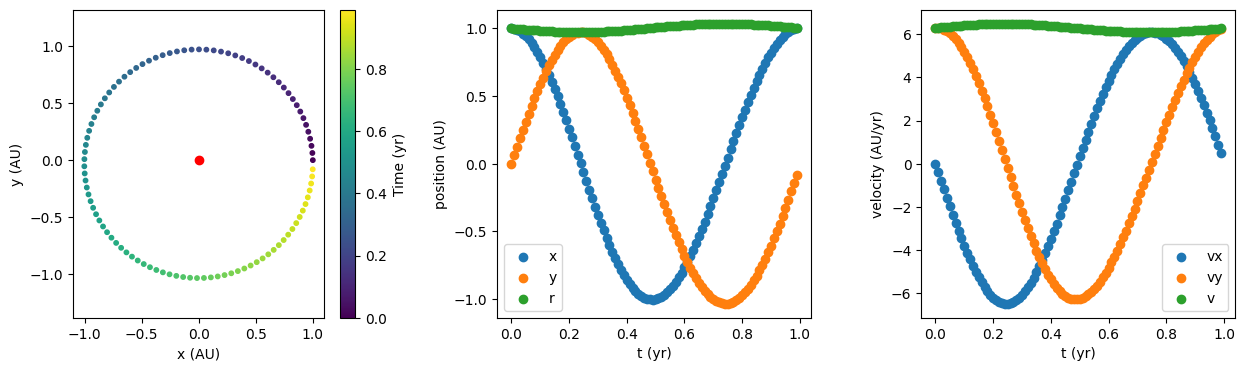

In [ ]:
x0 = 1 # initial x position in AU
y0 = 0 # initial y position in AU
v0x = 0 # initial x velocity in AU/yr
v0y = 2*np.pi# initial y velocity in AU/yr
tmax = 1# time in years
dt = 0.01# time step in years


# call main
main(x0,y0,v0x,v0y,tmax,dt,cromer=True)

### Question 1

Describe the Earth's orbit.  How does the radius change with time?  How does the magnitude of the velocity or speed change with time?


In [ ]:
'''
the radius fluctuates about 1 AU over time.

the speed fluctuates about 2pi AU/yr over time.
''';

# Modifying the initial velocity

(10 points)

What if the Earth's velocity suddenly increased?  Would its orbit change?  If so, how?

This is a question that is challenging to solve analytically, but we can easily solve it numerically.

In the cell below, increase the initial velocity by one, and then rerun main.  

**Be sure to adjust `tmax` so that the planet completes at least one full orbit.**



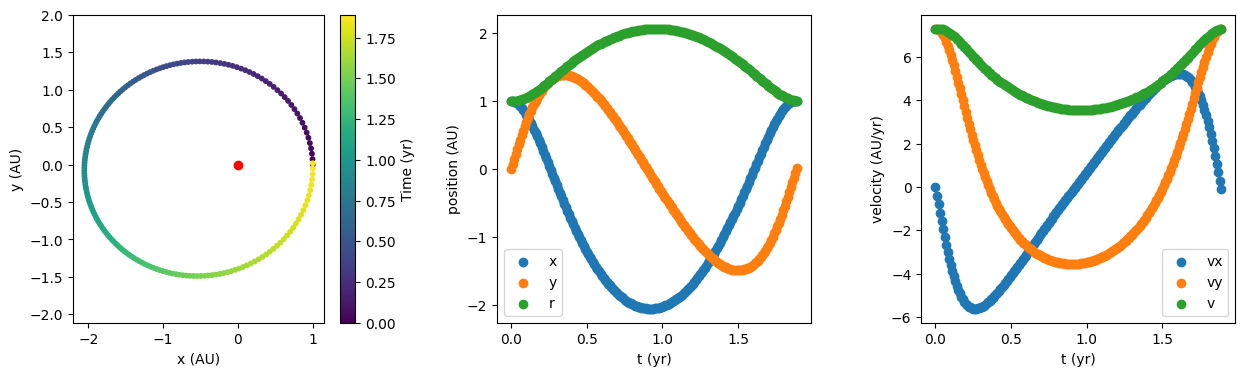

In [ ]:
# write your code here to increase the initial velocity by one

x0 = 1 # initial x position in AU
y0 = 0 # initial y position in AU
v0x = 0 # initial x velocity in AU/yr
v0y = 2*np.pi+1 # initial y velocity in AU/yr
tmax = 1.9# time in years
dt = 0.01# time step in years


# call main
main(x0,y0,v0x,v0y,tmax,dt,cromer=True)

Repeat this again, but this time decrease the initial velocity by one:
```python
v0y = 2*np.pi - 1
```

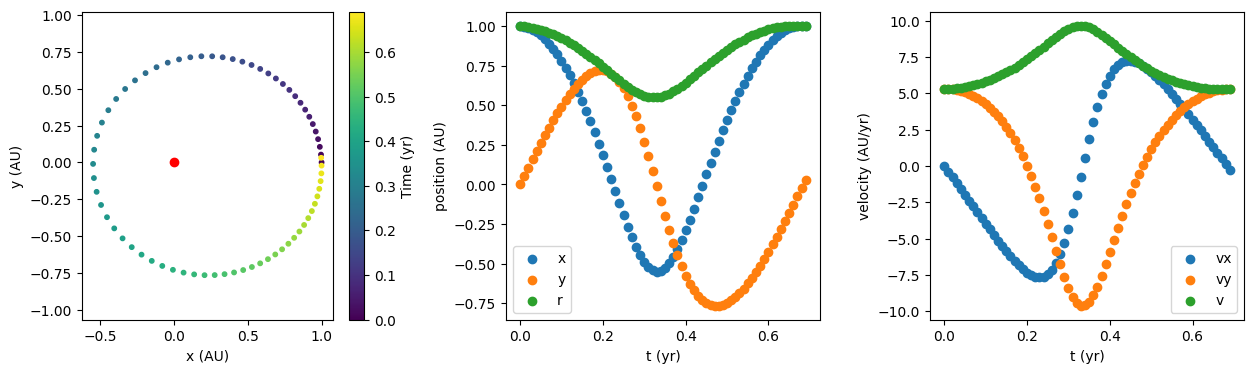

In [ ]:
# write code to decrease initial velocity by one
x0 = 1 # initial x position in AU
y0 = 0 # initial y position in AU
v0x = 0 # initial x velocity in AU/yr
v0y = 2*np.pi-1 # initial y velocity in AU/yr
tmax = 0.7# time in years
dt = 0.01# time step in years


# call main
main(x0,y0,v0x,v0y,tmax,dt,cromer=True)

### Question 2

* Describe what happens to the Earth's orbit when you increase the initial velocity.  Describe how the distance between the Earth and Sun changes with time.  Describe how the Earth's speed changes with time. What is the relationship between speed and distance from the Sun?

* Describe what happens to the Earth's orbit when you decrease the initial velocity. Describe how the distance between the Earth and Sun changes with time.  Describe how the Earth's speed changes with time. What is the relationship between speed and distance from the Sun?

* Kepler's 1st Law states that the planets orbit the Sun in elliptical orbits, with the Sun at one of the foci.  Are your modeling results consistent with Kepler's 1st Law?  What determines if a planet or other solar system body orbits in a circular or elliptical orbit?

* Kepler's 2nd Law states that planets sweep out equal area in equal time.  This means that planets travel faster when they are closer to the Sun, and slower when they are further from the Sun.  Are your modeling results consistent with Kepler's 2nd Law?

In [ ]:
'''
the orbit gets further away from the sun in the negative x position with an increase in initial velocity. the distance between the earth and the sun reaches a peak of
~2 AU before returning back to 1 AU over time. the speed of the earth drops to ~4 AU/yr before returning back to 2pi AU/yr over time. the speed and the distance between
the sun and the earth are inversely proportional

the orbit gets further away from the sun in the positive x position with an decrease in initial velocity. the distance between the earth and the sun reaches a min of
~0.5 AU before returning back to 1 AU over time. the speed of the earth peaks to ~10 AU/yr before returning back to 2pi AU/yr over time. the speed and the distance between
the sun and the earth are inversely proportional

the models reflect Kepler's 1st law. the orbit is only circular if the initial velocity is equal to the square root of the quotient of the product of the universal
gravitational constant and mass of earth, divided by the distance between the earth and the sun

the models are consistent with Kepler's 2nd law
''';

# Stability of the Orbital Model

(5 points)

* In the cells below, rerun your model, but increase the total time to 2, 3, and 4 years.  Use the initial velocity of ```v0y = 2 np.pi```.


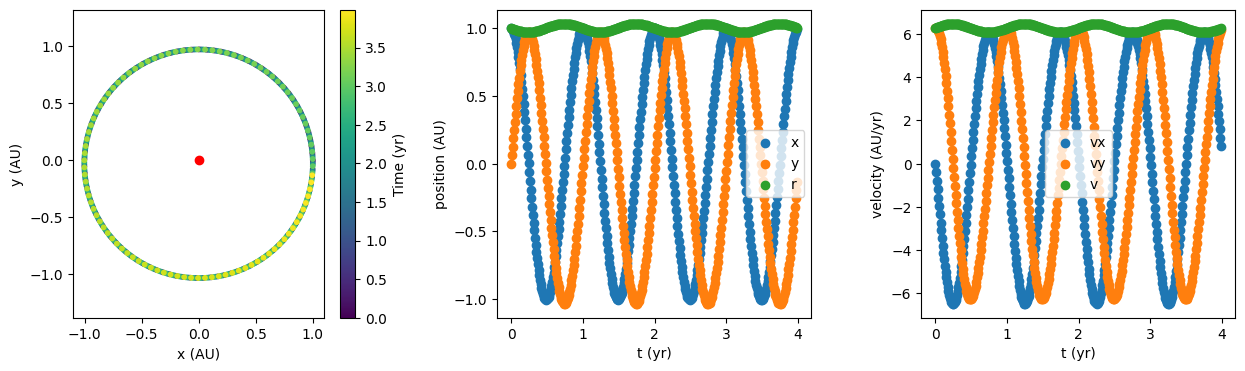

In [ ]:
x0 = 1 # initial x position in AU
y0 = 0 # initial y position in AU
v0x = 0 # initial x velocity in AU/yr
v0y = 2*np.pi # initial y velocity in AU/yr
tmax = 4# time in years
dt = 0.01# time step in years


# call main
main(x0,y0,v0x,v0y,tmax,dt,cromer=True)

### Question 3

* Does the orbit stay stable?  If the orbit stays stable, then the points from multiple orbits will fall on top of each other.

In [ ]:
'''
the orbit is stable
''';

# Euler vs. Euler-Cromer Method

(5 points)

* In the cell below, rerun the initial model, but use the Euler method instead of the Euler-Cromer method.

* set tmax to 4 years to see if and how the orbit changes with time.



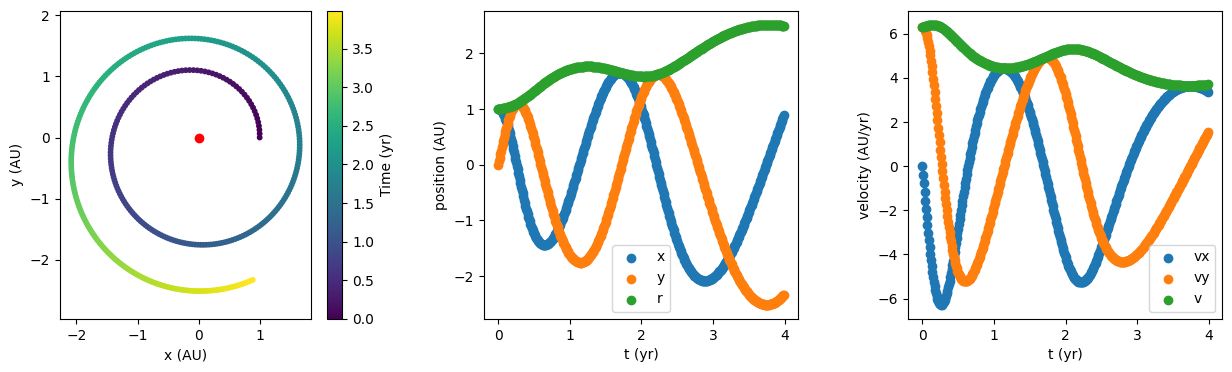

In [ ]:
x0 = 1 # initial x position in AU
y0 = 0 # initial y position in AU
v0x = 0 # initial x velocity in AU/yr
v0y = 2*np.pi # initial y velocity in AU/yr
tmax = 4# time in years
dt = 0.01# time step in years


# call main
main(x0,y0,v0x,v0y,tmax,dt,cromer=False)

### Question 4

* does orbit stay stable when using the Euler method?  
* describe what happens to the radius and speed over time.  What does this imply about the total energy of our Earth-Sun model?
* are your results consistent with what we observed when using the Euler method to model the simple harmonic motion of a mass on a spring?
* is the Euler method appropriate to use when modeling planetary motion?

In [ ]:
'''
the orbit is not stable with the Euler method

the radius increases over time and the speed decreases over time. this implies that the total energy decreases over time

the Euler method of simple harmonic motion indicated that the total energy increases over time which is the direct opposite

the Euler method is not appropriate because if it did reflect reality, there would not be life on this planet
''';

# Adapt your model

(5 points)

Use your code to model the motion of another planet, or of a comet.

The mass of the Sun is 2E33 kg.  Here are some orbital parameters for other planets:

| Planet | Orbital Radius (AU) | Eccentricity | Mass (kg) |
|-------|---------|--|--|
|Mercury | 0.39 | 0.206 |2.4E23 |
| Venus | 0.72 |0.007|4.9E24 |
|Earth | 1.00 | 0.017|6.0E24 |
| Mars | 1.52 |0.093| 6.6E23 |
| Jupiter | 5.20 |0.048| 1.9E27|
| Saturn | 9.54 |0.056|5.7E26 |
| Uranus | 19.19 |0.046|8.8E25|
| Neptune | 30.06 |0.010|1.03E26|
|Pluto | 39.53 | 0.248|1.3E22|


### Initial Conditions

For objects moving in elliptical orbits, the maximum distance between the planet and Sun is:

$$r_{max} = a(1+e) $$

At this point, the object is moving with its slowest speed (Kepler's Second Law).  The min speed is given by:

$$v_{min} = \sqrt{GM_{sun}} \sqrt{\frac{1-e}{a(1+e)} \left( 1 + \frac{M_P}{M_{sun}}\right) }$$


### Compare Your Model Period to the Expected Period

You can use google to find the period of the object you are modeling.  Our use Kepler's 3rd Law, which states the period squared is proportional to the semi-major axis cubed.  When dealing with objects that are orbiting the Sun, if we measure the period in years and the semi-major axis (or radius) in AU, then the relationship simplifies to:

$$p_{yr} ^2 = a_{AU}^3.$$

Compare with the orbital period (time to complete one revolution) determined from your model.

Result matches Kepler's 3rd law calculation: 11.05


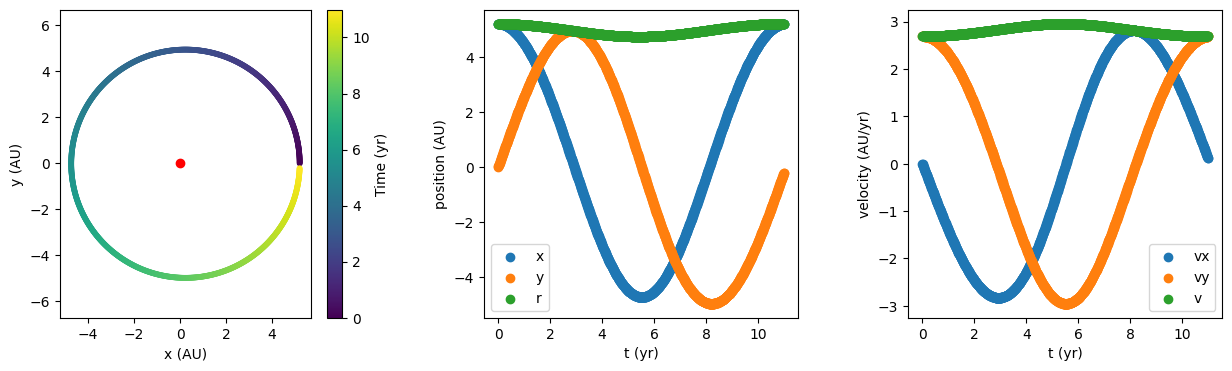

In [ ]:
# jupiter
a = 5.2/(1+0.048)
v = 2*np.pi*np.sqrt((1-0.048)/5.2*(1+((1.9*10**27)/(1.99*10**30))))

x0 = 5.2 # initial x position in AU
y0 = 0 # initial y position in AU
v0x = 0 # initial x velocity in AU/yr
v0y = v # initial y velocity in AU/yr
tmax = 11# time in years
dt = 0.01# time step in years


# call main
main(x0,y0,v0x,v0y,tmax,dt,cromer=True)

# 11.86 yrs orbital period from google, so pretty close
print(f"Result matches Kepler's 3rd law calculation: {np.sqrt(a**3):.2f}")